#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 190110043, 190040012
4. Write your names here: Manan Mohnot, Aman Jain
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [108]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    PI = 3.141592  #Declaring the value of Pi as constant
    mu=np.mean(X,axis=0)  # taking mean of matrix x column wise
    sigma = np.std(X,axis=0) # taking std of matrix x column wise
    X=(X-mu)/sigma # X is normalised matrix
    return X # returning X
    #raise NotImplementedError()

In [109]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [110]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    X1 = np.c_[X,np.ones(N)] # adding a column of ones at the end
    prediction=(X1.dot(w)) # prediction is X1 x w
    #prediction = np.sum(X1*w,axis=1)
    #print(np.shape(prediction))
    return prediction # returning prediction
    raise NotImplementedError()


In [111]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1])
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [112]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    N=np.shape(X)[0]
    prediction = Prediction(X,w)
    #print(N)
    mse = (np.sum((t - prediction)**2))/(N)
    return mse
    
    raise NotImplementedError()

In [113]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [114]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    prediction = Prediction(X,w) # using prediction function 
    mae = (np.sum(abs(t - prediction)))/(N) # calculating mean absolue error
    return mae # returning mai
    raise NotImplementedError()

In [115]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [116]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    prediction = Prediction(X,w) # calling the prediction value
    #print(N)
    sum_w=0     # initializing a variable to store the sum of weights
    for i in w[:-1]: # starting the for loop
        sum_w=sum_w + i*i # adding the weights
    L2_loss = (np.sum((t - prediction)**2))/N + lamda*np.sqrt(sum_w) # calculating the L2 Loss
    return L2_loss # returning
    raise NotImplementedError()

In [117]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [118]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    prediction = Prediction(X,w) # calculating the prediction
    sum_o=0  # for storing the sum of absolute values of weights
    for i in w[:-1]: # for loop starts
        sum_o=sum_o + np.abs(i) # adding the absolute values of weights
    L1_loss = (np.sum((t - prediction)**2))/N + lamda*sum_o # L1 loss value calculation
    return L1_loss # returning 
    raise NotImplementedError()

In [119]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [120]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE 
    N=np.shape(X)[0] # finding the no of rows of X
    prediction = Prediction(X,w) # calculates the prediction value
    nrmse = np.sqrt(((np.sum((t - prediction)**2))/(N)))/(np.std(t)) # calculating nrmse
    return nrmse # returning nrmse
    raise NotImplementedError()

In [121]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [122]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    X1 = np.c_[X,np.ones(N)] # adding a column  of 1
    grad = (X1.T.dot(X1.dot(w)-t)) # taking the gradient, the derivative was calcualted on paper
    return grad # returning gradient
    raise NotImplementedError()

In [123]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [124]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    X1 = np.c_[X,np.ones(N)] # adding a column
    s = (X1.dot(w)-t)/(np.abs(X1.dot(w)-t)) # calculating an array keeping the absolute function in mind
    grad=X1.T.dot(s)/2 # calcualting the gradient
    # print(grad)
    return grad # returning the gradient
    raise NotImplementedError()

In [125]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [126]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    #TODO one value not matching
    N=np.shape(X)[0] # finding the no of rows of X
    sum_w=0 # variable for storing the sum
    for i in w[:-1]:
        sum_w=sum_w + i*i # summing up weights
    mse = MSE_Gradient(X,t,w,lamda=0) # calcuating the mse
    f = w*lamda/(np.sqrt(sum_w)) # the other term used in grad
    grad = mse + w*lamda/(np.sqrt(sum_w)) # calculating the grad
    grad[-1]-= f[-1] # subtracting the term corresponding to bias
    return grad # returning the grad
    raise NotImplementedError()

In [127]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [128]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    #TODO one value not matching
    mse = MSE_Gradient(X,t,w,lamda=0) # calculating the mse
    N=np.shape(X)[0] # finding the no of rows of X
    X1 = np.c_[X,np.ones(N)] # adding a column
    s = w/(abs(w)) # calculating the signs
    f = lamda*s # a term for gradient
    grad=mse + f # calculating the gradient
    grad[-1]-= f[-1] # deducting the bias term
    return grad # returning the gradient
    raise NotImplementedError()

In [129]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [130]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    iter = 0 # the iteration variable
    step = 1 #  step
    loss_old = lossfunc(X,t,w,lamda) # calculating the loss
    while iter < max_iter and step > epsilon: # conditions for while loop
      w = w - lr*gradfunc(X,t,w,lamda) # updating the weights 
      loss = lossfunc(X,t,w,lamda) # calculating the loss for the new weights
      step = abs(loss - loss_old) # taking the difference of loss
      loss_old = loss # assigning the new value
      iter+=1 # increasing the iteration number
    w_final = w # a variable holding weights
    train_loss_final = lossfunc(X,t,w_final,lamda) # value of train loss for w_final
    validation_loss_final = lossfunc(X_val,t_val,w_final,lamda) # validation loss
    validation_NRMSE = NRMSE_Metric(X_val,t_val,w_final,lamda) # nrmse loss
    #raise NotImplementedError()
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    

In [131]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [132]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    X = np.c_[X,np.ones(np.shape(X)[0])] # adding a column for bias
    I = np.identity(np.shape(X)[1]) #Initializing Identity Matrix
    psuedo = np.dot(np.linalg.inv((np.dot(X.T,X) + lamda*I)),np.dot(X.T,t)) #calculating psuedo inverse according to the formula 
    #raise NotImplementedError()
    return psuedo #returning the psuedo inverse

In [133]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [47]:
url_train="https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv" #referencing url of data
df_train = pd.read_csv(url_train) #importing train data
# display(df_train) # display train data

url_test = "https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv" #referencing url of test data
df_test = pd.read_csv(url_test) #importing test data
# display(df_test) # display test data
# print(df_train.corr())

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,23.9,19.8,82.235489,89.673126,20.718329,16.868849,14.908830,86.993173,0.759186,0.862202,...,0.348464,2.153618,5.217196,1.139555,37.5507,127.040,26.2980,0.5721,4416.057129,21.0
6078,24.4,19.7,79.676888,90.329170,20.957463,17.063541,13.844681,95.444412,0.787284,0.901921,...,0.297791,1.894275,5.737044,1.002951,37.5102,127.086,21.9668,0.1332,4401.705566,21.4
6079,24.8,19.9,82.331352,90.905838,20.804890,16.927768,14.502989,85.178889,0.769457,0.949824,...,0.413629,1.465975,4.861343,0.750402,37.5372,126.891,15.5876,0.1554,4403.272949,21.2
6080,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,0.947244,...,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672,21.1


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,...,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,...,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,...,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,...,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,...,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.004380,0.0,0.0,0.0,0.000000,37.5507,127.040,26.2980,0.5721,4456.024414
1502,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.017678,0.0,0.0,0.0,0.000000,37.5102,127.086,21.9668,0.1332,4441.803711
1503,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.0,0.0,0.0,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965
1504,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.0,0.0,0.0,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535


                  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.606319    -0.233283    -0.316946   
Present_Tmin          0.606319      1.000000     0.112085    -0.001920   
LDAPS_RHmin          -0.233283      0.112085     1.000000     0.578051   
LDAPS_RHmax          -0.316946     -0.001920     0.578051     1.000000   
LDAPS_Tmax_lapse      0.566111      0.427599    -0.615629    -0.383872   
LDAPS_Tmin_lapse      0.627311      0.760888     0.055063    -0.115767   
LDAPS_WS             -0.115967     -0.022108     0.269429     0.105610   
LDAPS_LH              0.135255     -0.016808    -0.069237     0.226431   
LDAPS_CC1            -0.297644      0.127327     0.608409     0.432689   
LDAPS_CC2            -0.205192      0.114282     0.747947     0.394598   
LDAPS_CC3            -0.144933     -0.002312     0.679387     0.217171   
LDAPS_CC4            -0.151439     -0.054973     0.494305     0.109508   
LDAPS_PPT1           -0.100500      0.

In [135]:
train_set = df_train[0:int(0.8*len(df_train))] #spliiting train data into 80:20 train:validation set
val_set = df_train[int(0.8*len(df_train)):]

In [136]:
train_set = train_set.apply(Normalize) #Normailizing training set
val_set= val_set.apply(Normalize) #Normailizing validation set

X_train = train_set.iloc[:,:-1] # Removing predicted column from dataset
t_train = train_set.iloc[:,-1] # Making dataset with predicted column 
X_val = val_set.iloc[:,:-1] # Removing predicted column from dataset
t_val = val_set.iloc[:,-1] # Making dataset with predicted column

In [137]:
X_train #checking training data

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.275633,-0.661540,0.143623,0.300203,-0.511134,-0.117385,-0.168197,0.262315,-0.527308,-0.621361,-0.563339,-0.605155,-0.307081,-0.256639,-0.218830,-0.225018,1.186768,-0.007096,2.774429,1.111246,1.434419
1,0.909446,-0.568765,-0.261630,0.228213,0.166705,0.387659,-0.663514,-0.273555,-0.559218,-0.433705,-0.572584,-0.617781,-0.307081,-0.256639,-0.218830,-0.225018,1.186768,0.509268,-0.315218,-0.543688,1.147778
2,0.798345,0.219830,-0.503263,-0.704814,0.258505,0.648329,-0.467350,-1.233181,-0.620337,-0.411370,-0.389359,-0.560990,-0.307081,-0.256639,-0.218830,-0.225018,0.651192,0.836718,-0.526432,-0.724419,1.134425
3,0.946480,0.266218,0.142547,1.055407,0.110977,0.039443,-0.681903,0.148355,-0.593762,-0.534710,-0.565553,-0.592058,-0.307081,-0.256639,-0.218830,-0.225018,1.988150,0.383325,-0.297636,0.928911,1.119138
4,0.724278,-0.429601,0.002847,0.164954,-0.114396,0.118192,-0.644566,1.440683,-0.839401,-0.440666,-0.492771,-0.450958,-0.307081,-0.256639,-0.218830,-0.225018,0.117599,1.806473,-0.494513,-0.549955,1.125140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,1.761222,0.683709,-0.488919,-0.335305,1.130546,1.046494,-0.861109,0.929355,-0.252561,-0.745610,0.826565,1.659941,-0.307081,-0.256639,-0.218830,0.116059,-0.685767,1.189356,-0.735515,-0.821271,0.897005
4861,1.613087,0.312606,-0.601168,-0.792423,1.128601,1.434745,-0.544788,0.920357,-0.356047,-0.776003,1.043910,1.578678,-0.307081,-0.256639,-0.218830,-0.105087,-0.150190,-1.266519,-0.853133,-0.805093,0.894117
4862,1.353851,0.590934,-0.692947,-1.487782,1.346216,1.745622,-0.400536,-0.219128,-0.322915,-0.721703,0.930714,1.561053,-0.307081,-0.256639,-0.218830,-0.073093,-0.417978,-1.039822,-0.821641,-0.756339,0.890891
4863,1.353851,0.683709,-0.855797,-1.622462,1.489781,1.648982,-0.294535,-0.920008,-0.272077,-0.772105,0.731555,1.607979,-0.307081,-0.256639,-0.218830,0.004589,-0.417978,-0.271575,-0.779441,-0.720630,0.903654


In [138]:
def RMSE_Metric (X, t, w, lamda=0): #defining RMSE Metric 
    # YOUR CODE HERE
    N=np.shape(X)[0] # finding the no of rows of X
    prediction = Prediction(X,w) #calculates prediction value
    rmse = np.sqrt(((np.sum((t - prediction)**2))/(N))) # calculates rmse
    return rmse #returns rmse

In [139]:
def R2(t_val,t_pred): #defining R2 Metric
  tmean = np.mean(t_val) # Mean of Output of validation set
  r2 = 1 - np.sum((t_pred-t_val)**2)/np.sum((t_val - tmean)**2) # calculating r2
  return r2 #returns r2

In [140]:
np.random.seed(0) #defining seed for random numbers
w = np.random.randn(X_train.shape[1] + 1) #defining random weight vector
# w=np.ones(X_train.shape[1] + 1)
# print(w)
#  0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient
# w_final, train_loss_final, validation_loss_final, validation_NRMSE
lamda_list_L1= [25,33,50,75,100,250,500] #lamda list for L1
lamda_list_L2 = [250,275,300,350, 400, 500,750,1000] #lamda list for L2
lamda_list_psuedo =[500,600,750,1000,1500,2000] #lamda list for Psuedo Inverse
reciprocal_L1 = [1/x for x in lamda_list_L1] #reciprocal of lamda list for L1
reciprocal_L2 = [1/x for x in lamda_list_L2] #reciprocal of lamda list for L2
reciprocal_psuedo = [1/x for x in lamda_list_psuedo] #reciprocal of lamda list for psuedo

train_losses_L2 = [] #initializing empty set to store train losses L2
val_losses_L2 = [] #initializing empty set to store validation losses L2
train_losses_L1 = [] #initializing empty set to store train losses L1
val_losses_L1 = [] #initializing empty set to store validation losses L1
weight_L1=[] #initializing empty set to store weights L1
weight_L2=[] #initializing empty set to store weights L2
weight_psuedo=[] #initializing empty set to store weights psuedo
NRMSE_L1_val=[] #initializing empty set to store validation NRMSE L1
NRMSE_L2_val=[] #initializing empty set to store validation NRMSE L2
NRMSE_psuedo_train=[] #initializing empty set to store training NRMSE psuedo inverse
NRMSE_psuedo_val=[] #initializing empty set to store validation NRMSE psuedo inverse
RMSE_psuedo_train=[] #initializing empty set to store training RMSE psuedo inverse
RMSE_psuedo_val=[] #initializing empty set to store validation RMSE psuedo inverse
RMSE_L1_train=[] #initializing empty set to store training RMSE L1
RMSE_L1_val=[] #initializing empty set to store validation RMSE L1
RMSE_L2_train=[] #initializing empty set to store training RMSE L2
RMSE_L2_val=[] #initializing empty set to store validation RMSE L2
  # L2 model
for lamda in lamda_list_L2:
  #finding optimal w for diff lamda using grad descent
    w_final, train_loss_final, validation_loss_final, validation_NRMSE = Gradient_Descent(X_train, X_val, t_train, t_val, w, lamda, 1000, 1e-10, 1e-5, L2_Loss, L2_Gradient)
    weight_L2.append(w_final) #appending weights
    train_losses_L2.append(train_loss_final) #appending train loss
    val_losses_L2.append(validation_loss_final) #appending validation loss
    NRMSE_L2_val.append(validation_NRMSE) #appending Nrmse
    validation_RMSE_L2 = RMSE_Metric(X_val,t_val,w_final,lamda) #finding validation rmse
    training_RMSE_L2 = RMSE_Metric(X_train,t_train,w_final,lamda) #finding training rmse
    RMSE_L2_train.append(training_RMSE_L2) #appending training rmse
    RMSE_L2_val.append(validation_RMSE_L2) #appending validation rmse
    #L1 model
for lamda in lamda_list_L1:
  #finding optimal w for diff lamda using grad descent
    w_final1, train_loss_final1, validation_loss_final1, validation_NRMSE1 = Gradient_Descent(X_train, X_val, t_train, t_val, w, lamda, 1000, 1e-10, 1e-5, L1_Loss, L1_Gradient)
    weight_L1.append(w_final1) #appending weights
    train_losses_L1.append(train_loss_final1) #appending train loss
    val_losses_L1.append(validation_loss_final1) #appending validation loss
    NRMSE_L1_val.append(validation_NRMSE1) #appending Nrmse
    validation_RMSE_L1 = RMSE_Metric(X_val,t_val,w_final1,lamda) #finding validation rmse
    training_RMSE_L1 = RMSE_Metric(X_train,t_train,w_final1,lamda) #finding training rmse
    RMSE_L1_train.append(training_RMSE_L1)#appending training rmse
    RMSE_L1_val.append(validation_RMSE_L1) #appending validation rmse
    #psuedo model
for lamda in lamda_list_psuedo:
    psuedo = Pseudo_Inverse (X_train, t_train, lamda) #finding optimal w for diff lamda using psuedo inverse
    weight_psuedo.append(psuedo) #appending weights
    validation_NRMSE_ps = NRMSE_Metric(X_val,t_val,psuedo,lamda) #finding validation nrmse
    training_NRMSE_ps = NRMSE_Metric(X_train,t_train,psuedo,lamda) #finding training nrmse
    validation_RMSE_ps = RMSE_Metric(X_val,t_val,psuedo,lamda) #finding validation rmse
    training_RMSE_ps = RMSE_Metric(X_train,t_train,psuedo,lamda) #finding training rmse
    NRMSE_psuedo_train.append(training_NRMSE_ps) #appending training nrmse
    NRMSE_psuedo_val.append(validation_NRMSE_ps) #appending validation nrmse
    RMSE_psuedo_train.append(training_RMSE_ps) #appending training rmse
    RMSE_psuedo_val.append(validation_RMSE_ps) #appending validation rmse

Text(0, 0.5, 'RMSE')

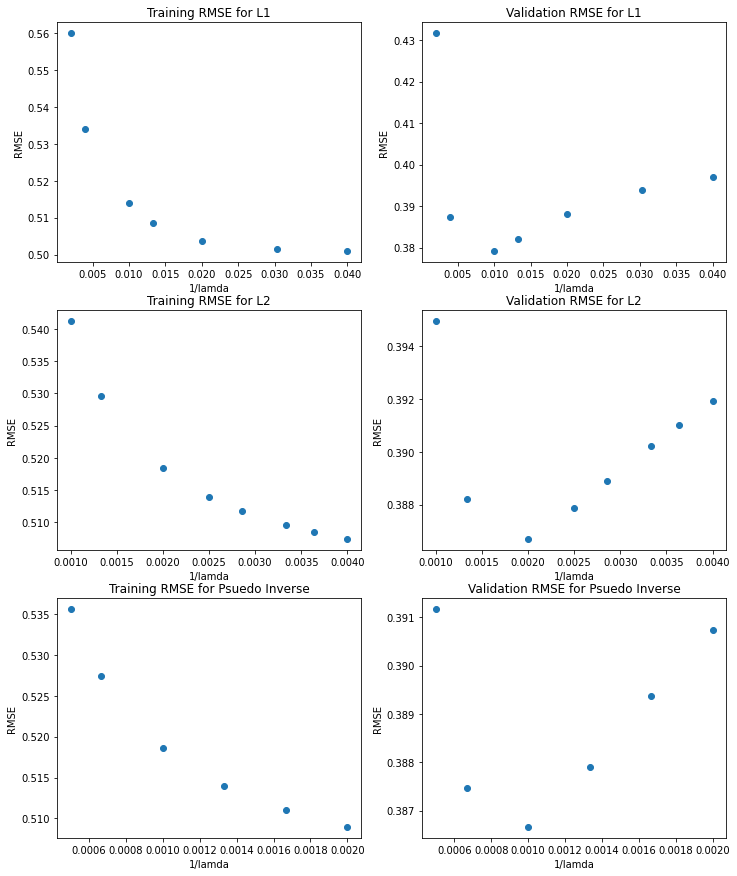

In [141]:
plt.figure(figsize=(12, 15)) #defining plot size
plt.subplot(3, 2, 1) #Subplot of 3 rows and 2 columns
plt.scatter(reciprocal_L1, RMSE_L1_train) #Plot of Training RMSE of L1 vs 1/lamda
plt.title("Training RMSE for L1") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('RMSE') #Y label
plt.subplot(3, 2, 2)
plt.scatter(reciprocal_L1, RMSE_L1_val) #Plot of Validation RMSE of L1 vs 1/lamda
plt.title("Validation RMSE for L1") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('RMSE') #Y label
plt.subplot(3, 2, 3)
plt.scatter(reciprocal_L2, RMSE_L2_train) #Plot of Training RMSE of L2 vs 1/lamda
plt.title("Training RMSE for L2") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('RMSE') #Y label
plt.subplot(3, 2, 4)
plt.scatter(reciprocal_L2, RMSE_L2_val) #Plot of Validation RMSE of L2 vs 1/lamda
plt.title("Validation RMSE for L2") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('RMSE') #Y label
plt.subplot(3, 2, 5)
plt.scatter(reciprocal_psuedo, RMSE_psuedo_train) #Plot of Training RMSE of Psuedo Inverse vs 1/lamda
plt.title("Training RMSE for Psuedo Inverse") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('RMSE') #Y label
plt.subplot(3, 2, 6)
plt.scatter(reciprocal_psuedo, RMSE_psuedo_val) #Plot of Validation RMSE of Psuedo vs 1/lamda
plt.title("Validation RMSE for Psuedo Inverse") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('RMSE') #Y label

Text(0, 0.5, 'NRMSE')

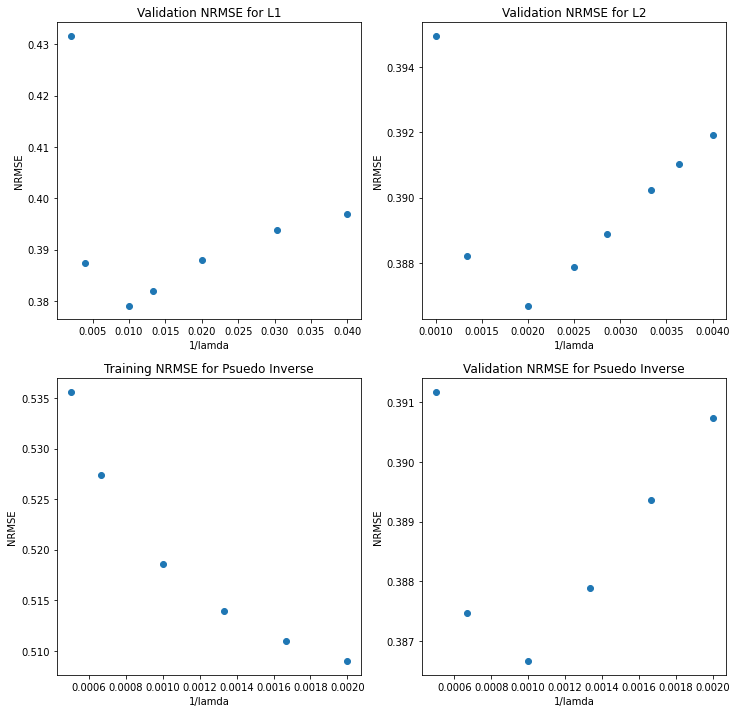

In [142]:
plt.figure(figsize=(12, 12)) #defining plot size
plt.subplot(2, 2, 1) #Subplot of 2 rows and 2 columns
plt.scatter(reciprocal_L1, NRMSE_L1_val) #Plot of Validation NRMSE of L1 vs 1/lamda
plt.title("Validation NRMSE for L1") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('NRMSE') #Y label
plt.subplot(2, 2, 2)
plt.scatter(reciprocal_L2, NRMSE_L2_val) #Plot of Validation NRMSE of L2 vs 1/lamda
plt.title("Validation NRMSE for L2") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('NRMSE') #Y label
plt.subplot(2, 2, 3)
plt.scatter(reciprocal_psuedo, NRMSE_psuedo_train) #Plot of Training RMSE of Psuedo vs 1/lamda
plt.title("Training NRMSE for Psuedo Inverse") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('NRMSE') #Y label
plt.subplot(2, 2, 4)
plt.scatter(reciprocal_psuedo, NRMSE_psuedo_val) #Plot of Validation RMSE of Psuedo vs 1/lamda
plt.title("Validation NRMSE for Psuedo Inverse") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('NRMSE') #Y label

Text(0, 0.5, 'Loss')

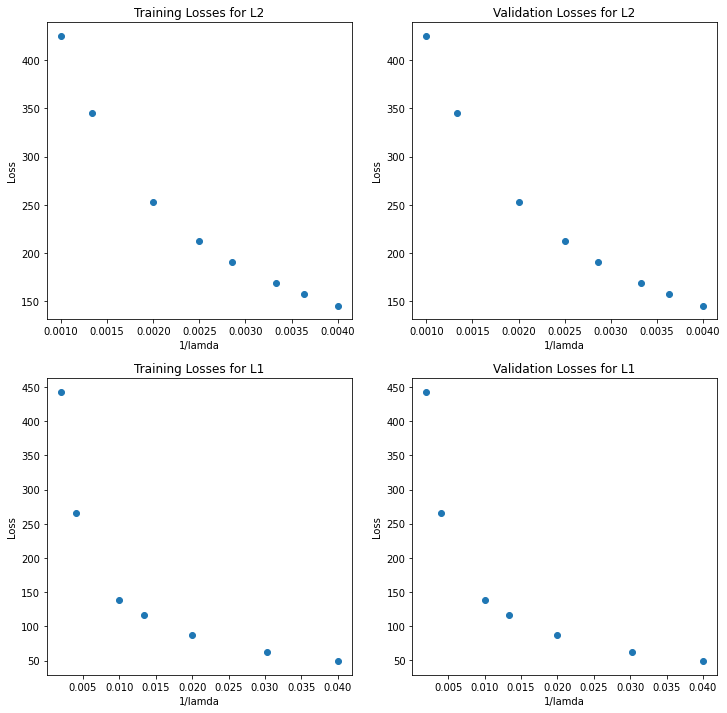

In [143]:
plt.figure(figsize=(12, 12)) #defining plot size
plt.subplot(2, 2, 1) #Subplot of 2 rows and 2 columns
plt.scatter(reciprocal_L2, train_losses_L2) #Plot of Training Loss of L2 vs 1/lamda
plt.title("Training Losses for L2") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('Loss') #Y label
plt.subplot(2, 2, 2)
plt.scatter(reciprocal_L2, val_losses_L2) #Plot of Validation Loss of L2 vs 1/lamda
plt.title("Validation Losses for L2") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('Loss') #Y label
plt.subplot(2, 2, 3)
plt.scatter(reciprocal_L1, train_losses_L1) #Plot of Training Loss of L1 vs 1/lamda
plt.title("Training Losses for L1") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('Loss') #Y label
plt.subplot(2, 2, 4)
plt.scatter(reciprocal_L1, val_losses_L1) #Plot of Validation Loss of L1 vs 1/lamda
plt.title("Validation Losses for L1") #plot title
plt.xlabel('1/lamda') #X label
plt.ylabel('Loss') #Y label

Model

In [144]:
print("For L1 \n", "Lamda:",lamda_list_L1[4],"\n","Weights",weight_L1[4],"\n","Validation RMSE:",RMSE_L1_val[4],"\n","Validation NRMSE:",NRMSE_L1_val[4],"\n")
print("For L2 \n", "Lamda:",lamda_list_L2[5],"\n","Weights",weight_L2[5],"\n","Validation RMSE:",RMSE_L2_val[5],"\n","Validation NRMSE:",NRMSE_L2_val[5],"\n")
print("For Psuedo Inverse \n", "Lamda:",lamda_list_psuedo[3],"\n","Weights",weight_psuedo[3],"\n","Validation RMSE:",RMSE_L1_val[3],"\n","Validation NRMSE:",NRMSE_L1_val[3])

For L1 
 Lamda: 100 
 Weights [ 1.32634417e-01  1.58782589e-02  4.38216949e-02 -8.88472138e-04
  5.82574573e-01  7.04200436e-02 -8.82047034e-02  7.17069531e-02
 -1.41533465e-01 -1.34446019e-04 -3.81040335e-02 -9.71814013e-02
 -1.01896570e-02  4.38292839e-02 -5.38196454e-04 -6.50236434e-04
 -4.88343113e-03 -2.77826175e-02 -1.14024045e-04  6.37805756e-03
  1.11669003e-02  4.40479924e-13] 
 Validation RMSE: 0.3791257293255203 
 Validation NRMSE: 0.3791257293255195 

For L2 
 Lamda: 500 
 Weights [ 1.26157769e-01  4.88327610e-02 -2.04698678e-03 -2.50596806e-02
  3.76035164e-01  1.62745869e-01 -1.09863891e-01  8.09763577e-02
 -1.25927564e-01 -7.39800467e-02 -8.71489793e-02 -8.94322657e-02
 -2.77209302e-02  6.59533582e-02  1.16267323e-03 -3.23617793e-03
 -1.62374685e-02 -2.09934652e-02 -5.16413621e-02  5.49987353e-02
  4.42849703e-02  6.32178433e-13] 
 Validation RMSE: 0.38669057162867165 
 Validation NRMSE: 0.3866905716286709 

For Psuedo Inverse 
 Lamda: 1000 
 Weights [ 1.26189471e-01  4.

In [145]:
#Predicted for validation data
X_val_for_pred=X_val
X_val_for_pred ['bias'] =  np.ones((1217, 1)) #adding column for bias
X_val_for_pred['Prediction'] =  [np.dot(weight_L1[4],X_val_for_pred.iloc[i,:]) for i in range(X_val_for_pred.shape[0])] #predicting for validation data

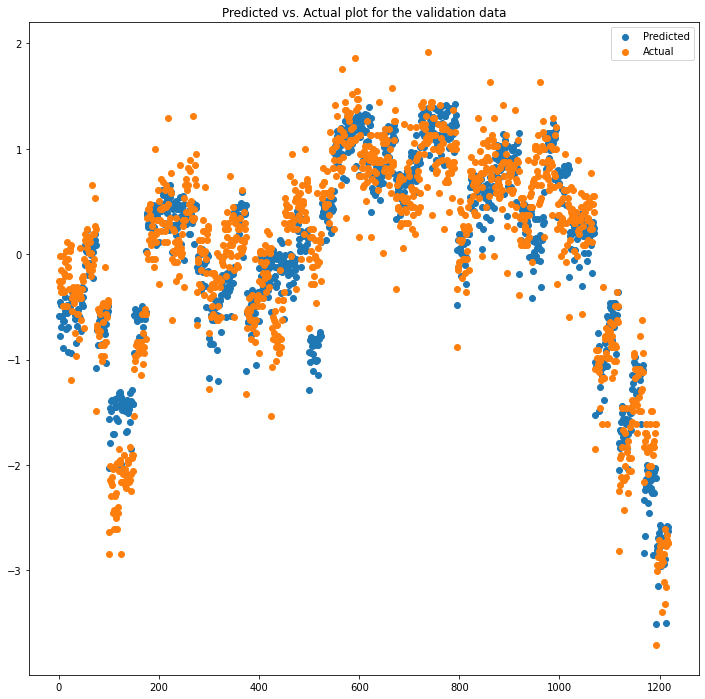

In [48]:
index=range(1,1218) #X axis of plot
plt.figure(figsize=(12, 12)) #Plot Size
plt.scatter(index,X_val_for_pred['Prediction'],label="Predicted") #plot of predicted values
plt.scatter(index,t_val,label='Actual') #plot of actual values
plt.title("Predicted vs. Actual plot for the validation data") #plot title
plt.legend() #shows legends


Text(0.5, 0, 'error')

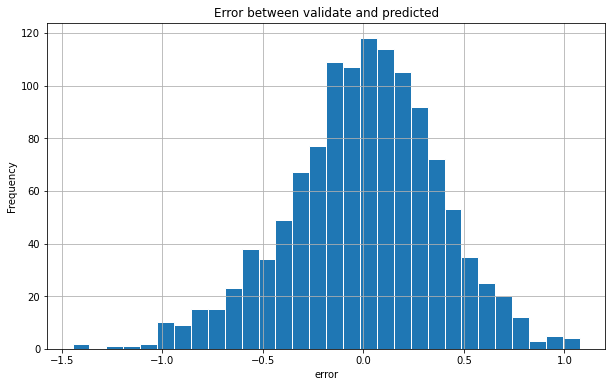

In [62]:
index=range(1,1218) #X axis of plot
plt.figure(figsize=(10, 6)) #Plot Size
plt.hist(X_val_for_pred['Prediction'] - t_val, bins = 30,  edgecolor="white"); #plot of predicted values
plt.grid()
plt.title("Error between validate and predicted")
plt.ylabel("Frequency")
plt.xlabel("error")

In [147]:
r=R2(t_val,X_val_for_pred['Prediction']) #R2 score for best model
print("R2 score for best model (L1 with lamda = 100):",r)

R2 score for best model (L1 with lamda = 100): 0.8562636813633925


In [148]:
df_test ['bias'] =  np.ones((df_test.shape[0], 1)) #adding column for bias
df_test['Prediction'] =  [np.dot(weight_L1[4],df_test.iloc[i,:]) for i in range(df_test.shape[0])] #predicting for test data

In [44]:
# df_test.to_csv('prediction.csv') # saving file

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): Shubham Chitnis, Ankit Kumar Jain, Shreyas Nadkarini
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 